# Examining individual NBA player attributes on and off the court using classic and Bayesian statistical approaches

In this project, I examine the distributions and normalcy of them and took the sample means of these populations to generate a normal distribution. Additionally, I used bootstrapping to bulk up the number of samples in my analyses to investigate the differences between salary and minutes played in the NBA. Using bootstrapped means, I calculate the differences in salary and minutes played based on the age of the player. Finally, I used Bayesian methods to examine the probability of players being active on Twitter in the last year.


In [1]:
# Install necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import itertools

%matplotlib inline

In [2]:
# Load NBA dataset
nba = pd.read_csv("~/Documents/UW Data Science Certificate/Methods for Data Analysis/Milestone Assignments/Data/nba_2016_2017_100.csv")
# Take a look at the first five rows
nba.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


In [3]:
# Check datatypes
print(nba.dtypes)
# Get column names
print(nba.columns)

PLAYER_ID                            int64
PLAYER_NAME                         object
TEAM_ID                              int64
TEAM_ABBREVIATION                   object
AGE                                  int64
GP                                   int64
W                                    int64
L                                    int64
W_PCT                              float64
MIN                                float64
OFF_RATING                         float64
DEF_RATING                         float64
NET_RATING                         float64
AST_PCT                            float64
AST_TO                             float64
AST_RATIO                          float64
OREB_PCT                           float64
DREB_PCT                           float64
REB_PCT                            float64
TM_TOV_PCT                         float64
EFG_PCT                            float64
TS_PCT                             float64
USG_PCT                            float64
PACE       

# Distributions

I chose a few columns that exhibited different distributions to evalue the normalcy of them. I am also interested in how the age of the players in the NBA relates to their salary and minutes played. The first step of comparing these attributes is to look at the distributions. Below I've plotted histograms of each column to visually get an idea of how the data is spread across each variable.

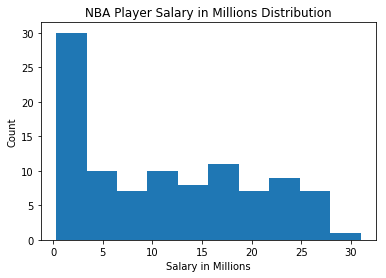

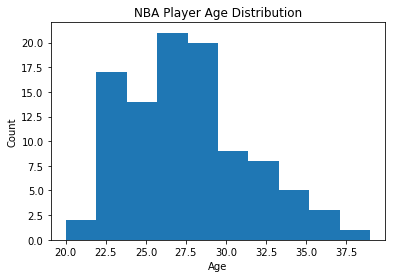

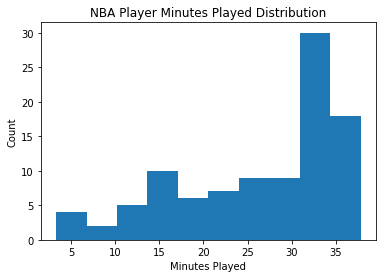

In [5]:
# define a function to plot histograms
def PlotHist(x, Title, x_label):
    plt.hist(x)
    plt.title(Title)
    plt.ylabel('Count')
    plt.xlabel(x_label)
    plt.show()

# extract the features to plot
# salary
salary = nba.loc[:, 'SALARY_MILLIONS']
# age
age = nba.loc[:, 'AGE']
# minutes
mins = nba.loc[:, 'MIN']

PlotHist(salary, 'NBA Player Salary in Millions Distribution', 'Salary in Millions')
PlotHist(age, 'NBA Player Age Distribution', 'Age')
PlotHist(mins, 'NBA Player Minutes Played Distribution', 'Minutes Played')



# Test Normalcy

Visually, you can see that the Age of NBA players is fairly normally distributed. However, the Salary and Minutes Played histograms reveal skewed distributions. Below, I've calculated the means and plotted the them. Then, I tested the normalcy of these means using a qqplot. The distributions of the sample means visually appeared normal (as expected) and the qqplot for both parameters shows a linear line confirming the normalcy of these populations. It appears that the sample means of the salary data are more normally distributed than the minutes played based on the qqplot line matching the red reference line more closely for the salary data.

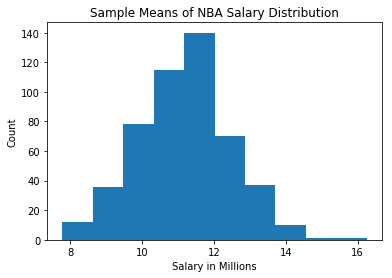

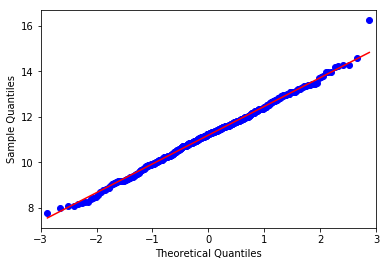

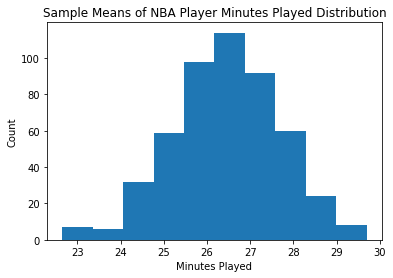

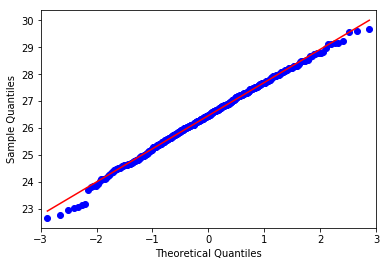

In [6]:
# Examine distributions and determine normalcy
# Calculate sample means of the salary data and plot the distributions of those means
salary_mean = np.array([np.random.choice(salary, size = 50, replace = True).mean()
                    for i in range(500)])
breaks = np.linspace(salary_mean.min(), salary_mean.max(), num = 40)

# Plot histogram of sample means of the salary data
PlotHist(salary_mean, 'Sample Means of NBA Salary Distribution', 'Salary in Millions')

# Plot qqplot
sm.qqplot(salary_mean, line = 's')
plt.show()

# Calculate the sample means of the minutes data and plot the distribution of those means
mins_mean = np.array([np.random.choice(mins, size = 50, replace = True).mean()
                    for i in range(500)])
breaks = np.linspace(mins_mean.min(), mins_mean.max(), num = 40)

# Plot histogram of sample means of the minutes data
PlotHist(mins_mean, 'Sample Means of NBA Player Minutes Played Distribution', 'Minutes Played')

# Plot qqplot
sm.qqplot(mins_mean, line = 's')
plt.show()


# Summary Statistics with the Classic Method

Below I've calculated the summary statistic of the same attributes I evaluted the distributions of above (Salary and Minutes Played). It's interesting that the avaerage salary is about 11 million dollars, based on my observations from the last assignment, I saw that there were many players being paid around 10 million dollars but were only playing around 5 minutes per game so the mean calculated below supports the graphical representation from my last assignment.  However, it's interesting to see that the average minutes played is 26 minutes. The means calculated and plotted above estimate the population mean very well compared to the actual mean of each attribute. The standard deviations, however, are not as representative of the the data and are quite far off from the actual standard deviations for both salary and minutes played. 

In [6]:
# Get summary statistics using classic methods
# salary summary stats
print('Salary Summary Statistics (Classic Method)')
salary_pop_mean = salary_mean.mean()
salary_pop_std = salary_mean.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (salary_pop_mean, nba.loc[:, 'SALARY_MILLIONS'].mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (salary_pop_std, nba.loc[:, 'SALARY_MILLIONS'].std()))

# minutes summary stats
print('\nMinutes Played Summary Statistics (Classic Method)')
mins_pop_mean = mins_mean.mean()
mins_pop_std = mins_mean.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (mins_pop_mean, nba.loc[:, 'MIN'].mean()))
print('Estimated s.d. (%.3f) vs actual s.d. (%.3f)' % (mins_pop_std, nba.loc[:, 'MIN'].std()))

Salary Summary Statistics (Classic Method)
Estimated mean (11.337) vs actual mean (11.290)
Estimated s.d. (1.281) vs actual s.d. (8.789)

Minutes Played Summary Statistics (Classic Method)
Estimated mean (26.319) vs actual mean (26.391)
Estimated s.d. (1.346) vs actual s.d. (9.221)


# Bootstrap Means

Below I plot the distributions of Salary and Minutes Played, with the mean and confidence intervals denoted on the plots. Because both of these columns have fairly skewed distributions and a relatively low sample size so it's hard to evaluate if the data are significantly different from each other. Therefore, I employed the bootstrapping method to calculate the mean of 1% of the data, include that mean in the original data and do this this 1000 times. This method increases the number of samples to work with and observe the trends. Then I plotted the means of both columns and found that salary and minutes played are not significantly different based on the histogram with the means falling within the confidence intervals of each attribute.

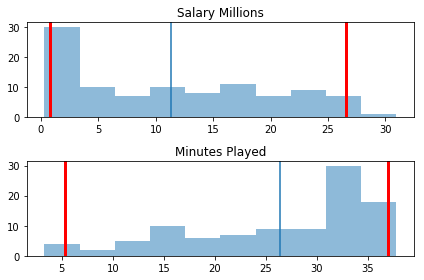

In [7]:
# Define a function to plot a histogram with confidence intervals
def plot_hist_CI(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval
    # upper and lower using numpy percentile
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
# Define a function to plot histograms of two populations
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    # create a combined series
    combined = pd.concat([a, b])
    # creating bin ranges from min and max
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist_CI(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist_CI(b)
    plt.title(b_label)
    
    plt.tight_layout()

# Plot histogram with mean and confidence intervals for salary and minutes played
plot_dists(salary, mins, 20, a_label='Salary Millions', b_label='Minutes Played')

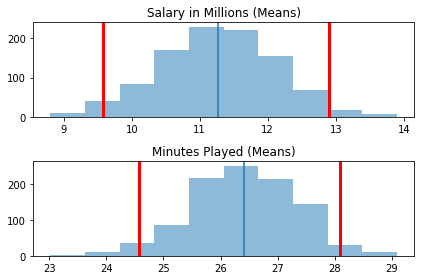

In [10]:
# Plot the differences between salary and minutes played with means and confidence intervals using the bootstrapping method
# number of sampels to return
n_replicas = 1000

# bootstrap salary data with 1000 extra values with replacement
salary_bootstrap_means = pd.Series([
    nba.sample(frac=1, replace=True).loc[:, 'SALARY_MILLIONS'].mean()
    for i in range(n_replicas)])
# bootstrap minutes played data with 1000 extra values with replacement
mins_bootstrap_means = pd.Series([
        nba.sample(frac=1, replace=True).loc[:, 'MIN'].mean()
        for i in range(n_replicas)])
# plot the distributions of the means of the two bootstrapped data with estimated population mean and confidence intervals
plot_dists(salary_bootstrap_means, mins_bootstrap_means, 
           nbins=100, a_label='Salary in Millions (Means)', b_label='Minutes Played (Means)')



# Plot Differences

Since I didn't see a signficant difference between the bootstrapped means of salary or minutes played, I decided to employ another variable to detect shifts in the data. I calculated the mean age of an NBA player (27.5 years) and used this value to determine if there are differences in salary or minutes played based on whether you're older or younger than 27.5 years old. Furthermore, I was curious to see if there was a difference in age and Twitter followers because I would expect the younger players to be more active on Twitter and therefore have more followers. 

Below, I used a plotted the differences as a histogram with a mean and confidence interval. The salary differences show that there is a significant shift in salary based on age. Since the confidence interval does not overlap zero we can confirm that the difference in the older and younger salaries is significantly different. The negative shift reveals that players older than the average age get paid more than younger players which makes logical sense since these players likely have more experience and therefore get paid more or have had the chance to sign larger more long term contracts.

However, there appears to be no significant shift in minutes played between older and younger players. This also makes logical sense because typically teams will keep older players as veterns to help establish the culture of team even if that means they aren't getting as many minutes or usage in games. 

Looking at the differences in Twitter followers based on age, there appears to be a significant shift. However, it's not in the directions I expected. The plot below suggests that players older than the average age in the NBA have more Twitter followers than that of the younger players. On second thought, this makes some sense because these players have likely been in the league longer and have been more visible to fans. Therefore, the more visible and larger individual fan bases for players over the average age in the NBA may result in more Twitter followers than the players younger than the average NBA age. 

Average Age of NBA Player:  27.51


Text(0.5, 1.0, 'Difference in Salary based on Age')

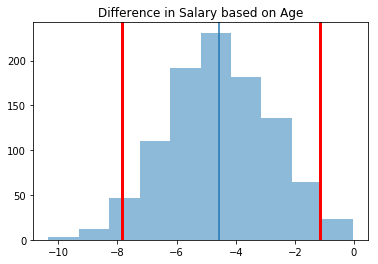

In [11]:
age_mean = nba.loc[:, 'AGE'].mean()
print('Average Age of NBA Player: ', age_mean)
# Plot the difference in salary based on age
# Create and empty array to store the calculated differences
diffs = []
# Loop through dataframe and sample with replacement, calculate the mean based on the age and calculate the difference
for i in range(n_replicas):
    # sample dataframe
    sample = nba.sample(frac=1.0, replace=True)
    # get mean of male samples
    young_sample_mean = sample[sample['AGE'] <= 27.5].loc[:, 'SALARY_MILLIONS'].mean()
    # get mean of female samples
    old_sample_mean = sample[sample['AGE'] >= 27.5].loc[:, 'SALARY_MILLIONS'].mean()
    # for each 1000 samples append mean difference
    diffs.append(young_sample_mean - old_sample_mean)
# convert from a list to a series
diffs = pd.Series(diffs)
# plot histogram of the differences
plot_hist_CI(diffs)
plt.title('Difference in Salary based on Age')

In [12]:
# Plot the difference in minuts based on age
# Create and empty array to store the calculated differences
diffs = []
# Loop through dataframe and sample with replacement, calculate the mean based on the age and calculate the difference
for i in range(n_replicas):
    # sample dataframe
    sample = nba.sample(frac=1.0, replace=True)
    # get mean of male samples
    young_sample_mean = sample[sample['AGE'] <= 27.5].loc[:, 'MIN'].mean()
    # get mean of female samples
    old_sample_mean = sample[sample['AGE'] >= 27.5].loc[:, 'MIN'].mean()
    # for each 1000 samples append mean difference
    diffs.append(young_sample_mean - old_sample_mean)
# convert from a list to a series
diffs = pd.Series(diffs)
# plot histogram of the differences
plot_hist(diffs)
plt.title('Difference in Minutes Played Based on Age')

NameError: name 'plot_hist' is not defined

In [ ]:
diffs = []
for i in range(n_replicas):
    # sample dataframe
    sample = nba.sample(frac=1.0, replace=True)
    # get mean of male samples
    young_sample_mean = sample[sample['AGE'] <= 27.5].loc[:, 'TWITTER_FOLLOWER_COUNT_MILLIONS'].mean()
    # get mean of female samples
    old_sample_mean = sample[sample['AGE'] >= 27.5].loc[:, 'TWITTER_FOLLOWER_COUNT_MILLIONS'].mean()
    # for each 1000 samples append mean difference
    diffs.append(young_sample_mean - old_sample_mean)
# convert from a list to a series
diffs = pd.Series(diffs)
# plot histogram of the differences
plot_hist_CI(diffs)
plt.title('Difference in Number of Twitter Followers Based on Age')

# Players Active on Twitter Using Bayesian Methods

In the NBA dataset, there is an attribute that denotes whether the players was active on Twitter in the last year. These data are binomially distributed, either the player was active or they were not. Below I used a uniform prior to use as the probability of a player being active on Twitter. With the actual data, I calculated the likelihood and then calculated the posterior and posterior distributions. As you can see below, the uniform prior doesn't contribute much to the posterior because the posterior and likelihood functions are the exact same. Therefore, I used a different prior and adjusted the parameters to better estimate the posterior using the prior and likelihood.

In [13]:
# Estimating Active Twitter Users Using Bayesian Methods
active_twitter = nba.loc[:, 'ACTIVE_TWITTER_LAST_YEAR']
# use binomial distribution formula
N = len(active_twitter)  # sample size
n_activetwitter = sum(active_twitter)  # number of players active on Twitter
n_not = N - n_activetwitter # number not on Twitter
print('Active on Twitter = %d Not Active on Twitter = %d'
    '\nProbability of being active on Twitter = %.1f' 
      % (n_activetwitter, n_not, n_activetwitter / (n_activetwitter + n_not)))


Active on Twitter = 93 Not Active on Twitter = 7
Probability of being active on Twitter = 0.9


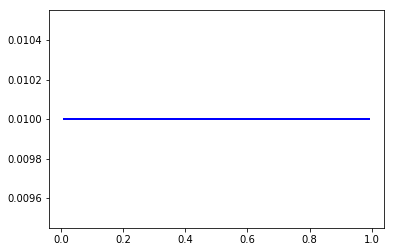

In [14]:
N = 100
# create array to feed to binomial dist calc
p = np.linspace(.01, .99, num=N)
p
# plug into binomial formula
pp = [1./N] * N
plt.plot(p, pp, linewidth=2, color='blue')


Text(0, 0.5, 'Likelihood')

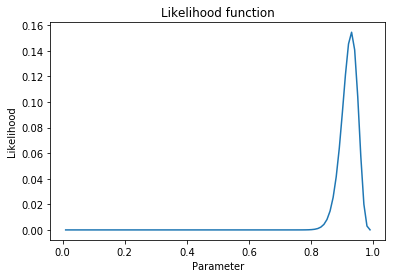

In [14]:
# sum to unity = make sum to 1
def likelihood(p, data):
    k = sum(data)
    N = len(data)
    # Compute Binomial likelihood
    l = scipy.special.comb(N, k) * p**k * (1-p)**(N-k)
    # Normalize the likelihood to sum to unity
    return l/sum(l)

l = likelihood(p, active_twitter)
plt.plot(p, l)
plt.title('Likelihood function')
plt.xlabel('Parameter')
plt.ylabel('Likelihood')


# Using a Beta Prior
Below, you can see the uniform prior does not contribute to estimating the posterior. Therefore, I used a beta prior to better estimate the posterior. I also plotted all the different paramters of the beta prior and adjusted them to better fit the posterior and likelihood functions plotted below. Based on these plots, it seems as though players are expected to be active on Twitter in the last year more often than not. These data can be extrapolated to suggest that the probability of players who are active on Twitter next year is quite high.

Maximum of the prior density = 0.010
Maximum likelihood = 0.154
MAP = 0.154


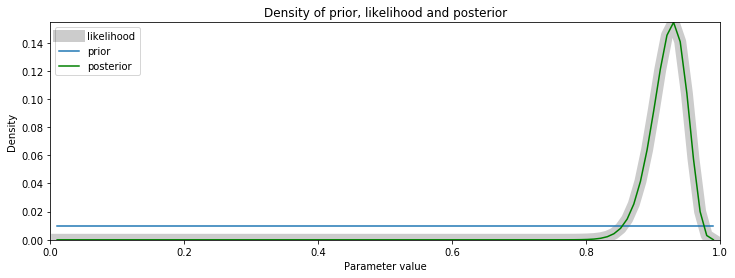

In [15]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

def plot_post(prior, like, post, x):
    # get the largest number from the priors and likelihood
    maxy = max(max(prior), max(like), max(post))
    plt.figure(figsize=(12, 4))
    plt.plot(x, like, label='likelihood', linewidth=12, color='black', alpha=.2)
    plt.plot(x, prior, label='prior')
    plt.plot(x, post, label='posterior', color='green')
    plt.ylim(0, maxy)
    plt.xlim(0, 1)
    plt.title('Density of prior, likelihood and posterior')
    plt.xlabel('Parameter value')
    plt.ylabel('Density')
    plt.legend()
    
post = posterior(pp, l)
plot_post(pp, l, post, p)
print('Maximum of the prior density = %.3f' % max(pp))
print('Maximum likelihood = %.3f' % max(l))
print('MAP = %.3f' % max(post))

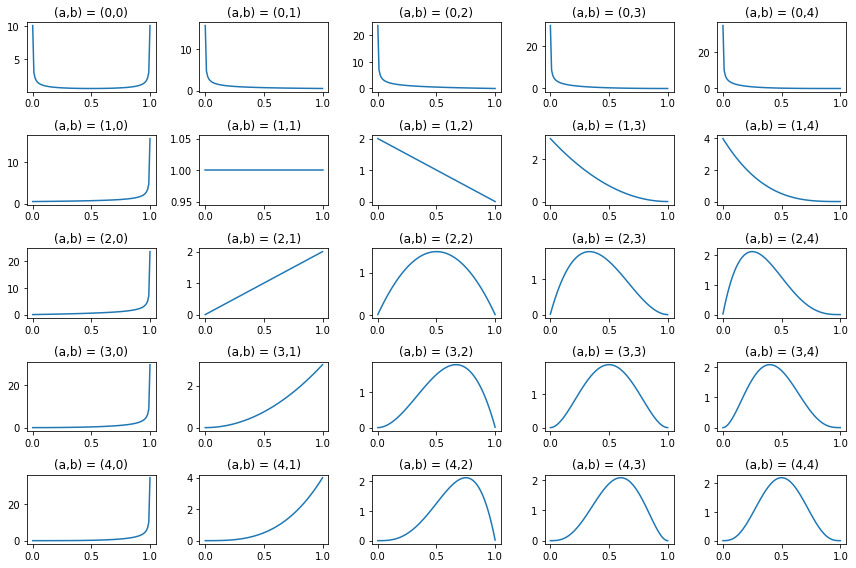

In [16]:
plt.figure(figsize=(12, 8))

# beta in binomial model control shape
alpha = [.5, 1, 2, 3, 4]
beta = alpha[:] # copying list

# create array within range 0,1
x = np.linspace(.001, .999, num=100)

# enumerate through cartesian product of both lists
# to view shape of all possible combinations of alpha, beta

for i, (a, b) in enumerate(itertools.product(alpha, beta)):
    plt.subplot(len(alpha), len(beta), i+1)
    plt.plot(x, scipy.stats.beta.pdf(x, a, b))
    plt.title('(a,b) = (%d,%d)' % (a,b))
plt.tight_layout()  


Maximum of the prior density = 0.067
Maximum likelihood = 0.154
MAP = 0.166


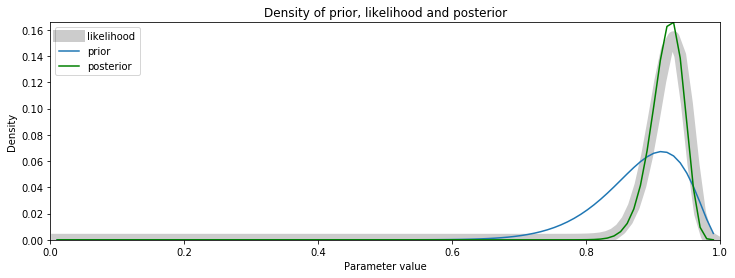

In [17]:
def beta_prior(x, a, b):
    l = scipy.stats.beta.pdf(p, a, b)  # compute likelihood
    return l / l.sum()  # normalize and return
# calculate priors
pp = beta_prior(p, 22, 3)
# calculate posterior
post = posterior(pp, l)
# plot
plot_post(pp, l, post, p)
print('Maximum of the prior density = %.3f' % max(pp))
print('Maximum likelihood = %.3f' % max(l))
print('MAP = %.3f' % max(post))

# Conclusion

The main takeaways from this project are the following:
* I examined the distributions of NBA salary and minutes played, to examine the normalcy of them and how taking the sample means of these populations result in a normal distribution. I used summary statistics to evaluate differences between the distributions of these two populations.
* Bootstrapping was a useful method to bulk up the number of samples in my analyses, I calculated the means and confidence intervals using the bootstrapping method and used them to investigate the differences between salary and minutes played in the NBA. 
* Finally, I used the bootstrapped means to calculate the differences in salary and minutes played based on the age of the player. For players greater than the average age, they tend to get paid more but play less. As I described above this is expected of a vetern player.
    * As an additional experiment, I found that there was a shift in the number of Twitter followers based on age. The players older than the average NBA player age had more Twitter followers than the younger players. Like I discussed above, this is not what I expected but may be explained by the players older than 27 have established a fan base in the league and therefore have more followers.
* Finally, I used Bayesian methods to examine the probability of players being active on Twitter in the last year. First I employed a uniform prior but switched to a beta prior and found that players are more likely to be on Twitter in the last year than not.